In [1]:
import pandas as pd
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib  import * 
from scipy import stats
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [2]:
df_train = pd.read_csv("DataTrained/happiness_score_dataset.csv")

In [3]:
df_train.head(10)

Country                     Region  Happiness Rank  Happiness Score  \
0  Switzerland             Western Europe               1            7.587   
1      Iceland             Western Europe               2            7.561   
2      Denmark             Western Europe               3            7.527   
3       Norway             Western Europe               4            7.522   
4       Canada              North America               5            7.427   
5      Finland             Western Europe               6            7.406   
6  Netherlands             Western Europe               7            7.378   
7       Sweden             Western Europe               8            7.364   
8  New Zealand  Australia and New Zealand               9            7.286   
9    Australia  Australia and New Zealand              10            7.284   

   Standard Error  Economy (GDP per Capita)   Family  \
0         0.03411                   1.39651  1.34951   
1         0.04884                   1.30232  1.40223   
2         0.03328                   1.32548  1.36058   
3         0.03880                   1.45900  1.33095   
4         0.03553                   1.32629  1.32261   
5         0.03140                   1.29025  1.31826   
6         0.02799                   1.32944  1.28017   
7         0.03157                   1.33171  1.28907   
8         0.03371                   1.25018  1.31967   
9         0.04083                   1.33358  1.30923   

   Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
0                   0.94143  0.66557                        0.41978   
1                   0.94784  0.62877                        0.14145   
2                   0.87464  0.64938                        0.48357   
3                   0.88521  0.66973                        0.36503   
4                   0.90563  0.63297                        0.32957   
5                   0.88911  0.64169                        0.41372   
6                   0.89284  0.61576                        0.31814   
7                   0.91087  0.65980                        0.43844   
8                   0.90837  0.63938                        0.42922   
9                   0.93156  0.65124                        0.35637   

   Generosity  Dystopia Residual  
0     0.29678            2.51738  
1     0.43630            2.70201  
2     0.34139            2.49204  
3     0.34699            2.46531  
4     0.45811            2.45176  
5     0.23351            2.61955  
6     0.47610            2.46570  
7     0.36262            2.37119  
8     0.47501            2.26425  
9     0.43562            2.26646

In [4]:
df_train.shape

(158, 12)

In [5]:
# checking for null values

df_train.isna().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

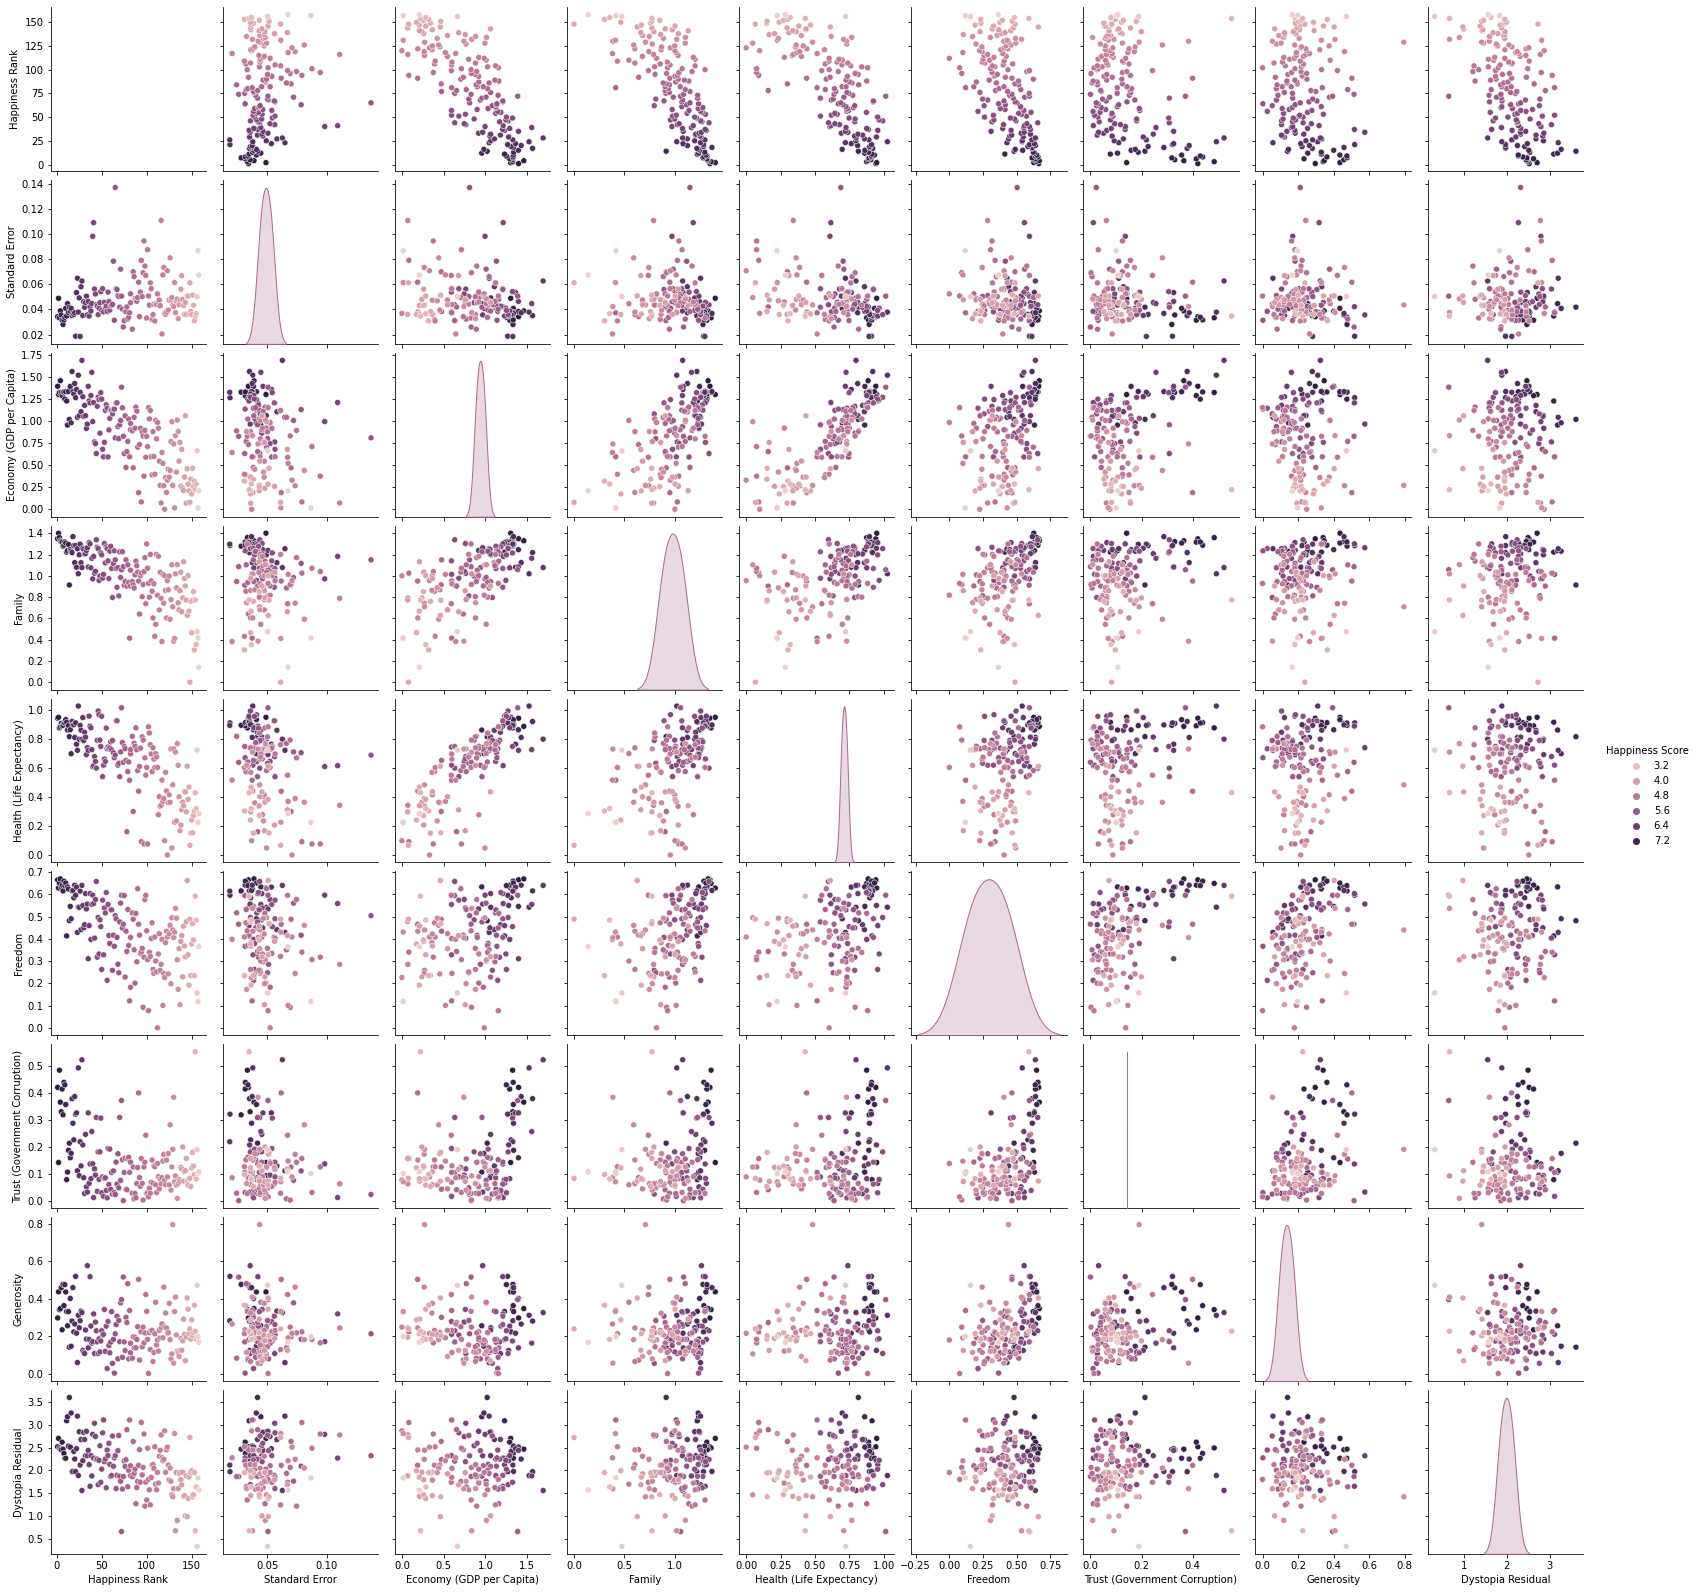

In [7]:
sns.pairplot(df_train, hue="Happiness Score")

<AxesSubplot:xlabel='Dystopia Residual', ylabel='Density'>

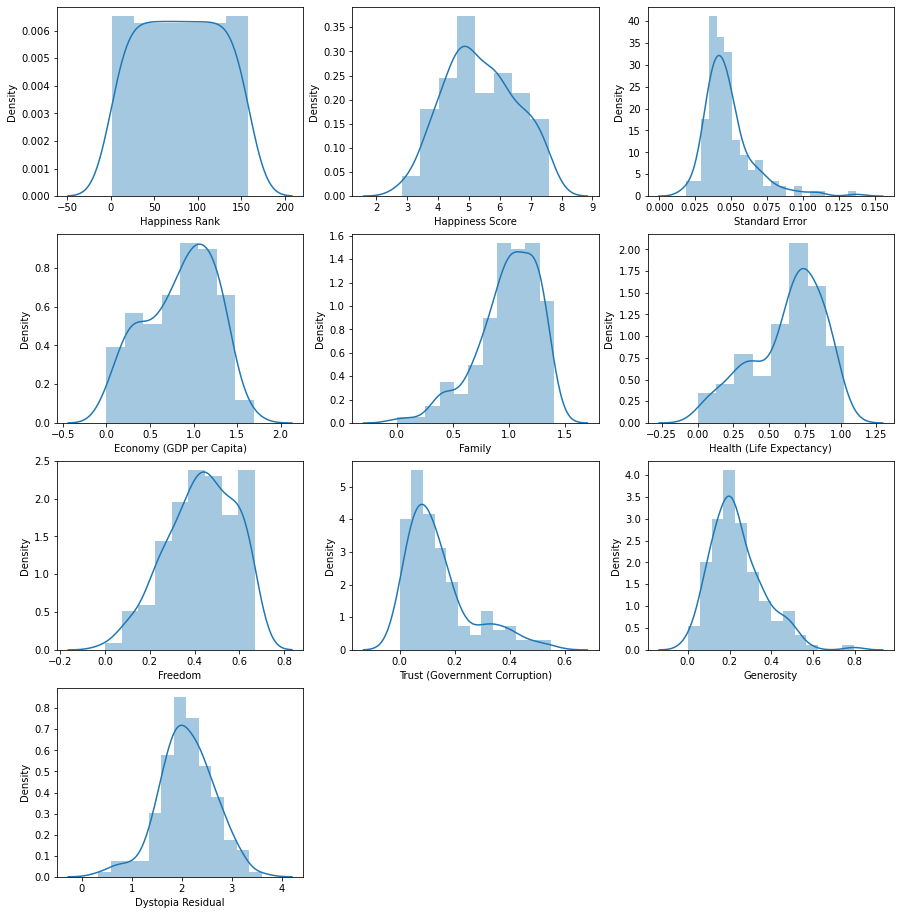

In [8]:
plt.figure(figsize=(15,16))

plt.subplot(4, 3, 1)
sns.distplot(df_train['Happiness Rank'])

plt.subplot(4, 3, 2)
sns.distplot(df_train['Happiness Score'])

plt.subplot(4, 3, 3)
sns.distplot(df_train['Standard Error'])

plt.subplot(4, 3, 4)
sns.distplot(df_train['Economy (GDP per Capita)'])

plt.subplot(4, 3, 5)
sns.distplot(df_train['Family'])

plt.subplot(4, 3, 6)
sns.distplot(df_train['Health (Life Expectancy)'])

plt.subplot(4, 3, 7)
sns.distplot(df_train['Freedom'])

plt.subplot(4, 3, 8)
sns.distplot(df_train['Trust (Government Corruption)'])

plt.subplot(4, 3, 9)
sns.distplot(df_train['Generosity'])

plt.subplot(4, 3, 10)
sns.distplot(df_train['Dystopia Residual'])


## Renaming of colums by removing spaces and Capital letters 

In [9]:
df_train.rename(columns = {'Happiness Rank':'happiness_rank','Happiness Score':'happiness_score','Standard Error':'standard_error'
                             ,'Economy (GDP per Capita)':'economy_gdp_per_capita','Family':'family',
                             'Health (Life Expectancy)':'health_life_expectancy','Freedom':'freedom',
                             'Trust (Government Corruption)':'trust_government_corruption','Generosity':'generosity',
                             'Dystopia Residual':'dystopia_residual','Country':'country','Region':'region'}, inplace = True)

In [10]:
print(df_train.columns)

Index(['country', 'region', 'happiness_rank', 'happiness_score',
       'standard_error', 'economy_gdp_per_capita', 'family',
       'health_life_expectancy', 'freedom', 'trust_government_corruption',
       'generosity', 'dystopia_residual'],
      dtype='object')


In [11]:
df_train.tail()

country                           region  happiness_rank  \
153   Rwanda               Sub-Saharan Africa             154   
154    Benin               Sub-Saharan Africa             155   
155    Syria  Middle East and Northern Africa             156   
156  Burundi               Sub-Saharan Africa             157   
157     Togo               Sub-Saharan Africa             158   

     happiness_score  standard_error  economy_gdp_per_capita   family  \
153            3.465         0.03464                 0.22208  0.77370   
154            3.340         0.03656                 0.28665  0.35386   
155            3.006         0.05015                 0.66320  0.47489   
156            2.905         0.08658                 0.01530  0.41587   
157            2.839         0.06727                 0.20868  0.13995   

     health_life_expectancy  freedom  trust_government_corruption  generosity  \
153                 0.42864  0.59201                      0.55191     0.22628   
154                 0.31910  0.48450                      0.08010     0.18260   
155                 0.72193  0.15684                      0.18906     0.47179   
156                 0.22396  0.11850                      0.10062     0.19727   
157                 0.28443  0.36453                      0.10731     0.16681   

     dystopia_residual  
153            0.67042  
154            1.63328  
155            0.32858  
156            1.83302  
157            1.56726

In [12]:
# let's check for unique happiness_score.

df_train['happiness_score'].unique()

array([7.587, 7.561, 7.527, 7.522, 7.427, 7.406, 7.378, 7.364, 7.286,
       7.284, 7.278, 7.226, 7.2  , 7.187, 7.119, 6.983, 6.946, 6.94 ,
       6.937, 6.901, 6.867, 6.853, 6.81 , 6.798, 6.786, 6.75 , 6.67 ,
       6.611, 6.575, 6.574, 6.505, 6.485, 6.477, 6.455, 6.411, 6.329,
       6.302, 6.298, 6.295, 6.269, 6.168, 6.13 , 6.123, 6.003, 5.995,
       5.987, 5.984, 5.975, 5.96 , 5.948, 5.89 , 5.889, 5.878, 5.855,
       5.848, 5.833, 5.828, 5.824, 5.813, 5.791, 5.77 , 5.759, 5.754,
       5.716, 5.709, 5.695, 5.689, 5.605, 5.589, 5.548, 5.477, 5.474,
       5.429, 5.399, 5.36 , 5.332, 5.286, 5.268, 5.253, 5.212, 5.194,
       5.192, 5.14 , 5.129, 5.124, 5.123, 5.102, 5.098, 5.073, 5.057,
       5.013, 5.007, 4.971, 4.959, 4.949, 4.898, 4.885, 4.876, 4.874,
       4.867, 4.857, 4.839, 4.8  , 4.788, 4.786, 4.739, 4.715, 4.694,
       4.686, 4.681, 4.677, 4.642, 4.633, 4.61 , 4.571, 4.565, 4.55 ,
       4.518, 4.517, 4.514, 4.512, 4.507, 4.436, 4.419, 4.369, 4.35 ,
       4.332, 4.307,

In [13]:
grouped_regions = df_train.groupby('region').mean()
grouped_regions[['happiness_score','happiness_rank']].sort_values('happiness_score', ascending=False)

happiness_score  happiness_rank
region                                                          
Australia and New Zealand               7.285000        9.500000
North America                           7.273000       10.000000
Western Europe                          6.689619       29.523810
Latin America and Caribbean             6.144682       46.909091
Eastern Asia                            5.626167       64.500000
Middle East and Northern Africa         5.406900       77.600000
Central and Eastern Europe              5.332931       79.000000
Southeastern Asia                       5.317444       81.222222
Southern Asia                           4.580857      113.142857
Sub-Saharan Africa                      4.202800      127.900000

In [14]:
regions = sorted(list(df_train['region'].unique()))
regions

['Australia and New Zealand',
 'Central and Eastern Europe',
 'Eastern Asia',
 'Latin America and Caribbean',
 'Middle East and Northern Africa',
 'North America',
 'Southeastern Asia',
 'Southern Asia',
 'Sub-Saharan Africa',
 'Western Europe']

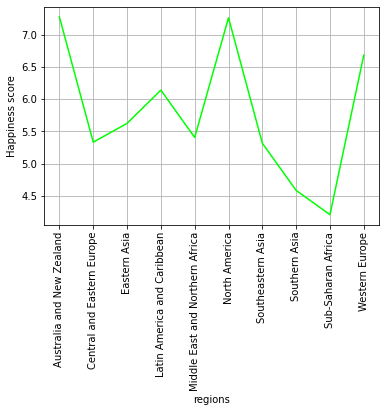

In [15]:
#Visualization

plt.rcParams["figure.figsize"] = 6,4
plt.plot(regions, grouped_regions['happiness_score'], color='lime')
plt.xticks(rotation = 'vertical')
plt.xlabel('regions')
plt.ylabel('Happiness score')
plt.grid()
plt.show()

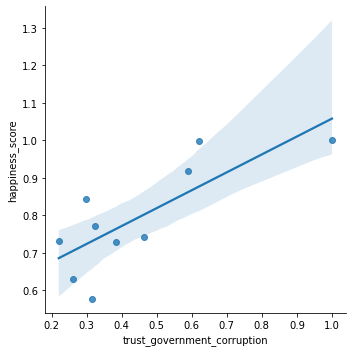

In [16]:
df_1=pd.pivot_table(df_train, index = 'region', values=["happiness_score","trust_government_corruption"])
#to normalize
df_1["happiness_score"]=df_1["happiness_score"]/max(df_1["happiness_score"])
df_1["trust_government_corruption"]=df_1["trust_government_corruption"]/max(df_1["trust_government_corruption"])
sns.lmplot("trust_government_corruption","happiness_score",data=df_1)
plt.show()

 ### Health (Life Expectancy) for Southern Asia Countries

In [17]:
#only for Southern Asia

df_region_southasia = df_train[df_train['region'] == 'Southern Asia']



In [18]:
df_train.describe()

happiness_rank  happiness_score  standard_error  \
count      158.000000       158.000000      158.000000   
mean        79.493671         5.375734        0.047885   
std         45.754363         1.145010        0.017146   
min          1.000000         2.839000        0.018480   
25%         40.250000         4.526000        0.037268   
50%         79.500000         5.232500        0.043940   
75%        118.750000         6.243750        0.052300   
max        158.000000         7.587000        0.136930   

       economy_gdp_per_capita      family  health_life_expectancy     freedom  \
count              158.000000  158.000000              158.000000  158.000000   
mean                 0.846137    0.991046                0.630259    0.428615   
std                  0.403121    0.272369                0.247078    0.150693   
min                  0.000000    0.000000                0.000000    0.000000   
25%                  0.545808    0.856823                0.439185    0.328330   
50%                  0.910245    1.029510                0.696705    0.435515   
75%                  1.158448    1.214405                0.811013    0.549092   
max                  1.690420    1.402230                1.025250    0.669730   

       trust_government_corruption  generosity  dystopia_residual  
count                   158.000000  158.000000         158.000000  
mean                      0.143422    0.237296           2.098977  
std                       0.120034    0.126685           0.553550  
min                       0.000000    0.000000           0.328580  
25%                       0.061675    0.150553           1.759410  
50%                       0.107220    0.216130           2.095415  
75%                       0.180255    0.309883           2.462415  
max                       0.551910    0.795880           3.602140

In [19]:
fig = px.scatter(df_region_southasia,
                x = 'health_life_expectancy',
                y = 'happiness_score',
                color = 'country',
                
                facet_row = 'happiness_rank',
                labels ={"happiness_score":"H Score"},
                template='plotly_dark',

                title = 'Health vs Happiness Score for South Asia'
                )

fig.show()

Here Sri Lanka and Bangladesh have highest Health life expectancy. But their happiness score is ranging between 4 and 5.


Although Bhutan has highest happiness score it has average Health life expectancy.

### Effect of Family Support on Happiness Index for south asia countries

In [20]:
df_region_southasia.groupby('country')['happiness_score'].max().sort_values(ascending=False).reset_index()

country  happiness_score
0       Bhutan            5.253
1     Pakistan            5.194
2   Bangladesh            4.694
3        India            4.565
4        Nepal            4.514
5    Sri Lanka            4.271
6  Afghanistan            3.575

In [21]:
fig = px.pie(data_frame=df_region_southasia,
             values='family',
             names='country',
             color='country', 
            hover_name='happiness_score',                        
             title='Family Support Index for Southasia Country',
             template='plotly_dark',
             width=600,                          
             height=400,                         
             hole=0.5,                          
            )

fig.update_traces(textposition='inside', textinfo='percent+label')

fig.show()

Bhutan has higher percent in pie for Family Support Index. 

Eventhough pakistan Family Support Index is low (0.4) it is having decent happiness score

### Europe Region

In [22]:
df_region_europe = df_train[df_train['region'].isin(['Western Europe', 'Central and Eastern Europe'])]

df_region_europe.country.unique()

array(['Switzerland', 'Iceland', 'Denmark', 'Norway', 'Finland',
       'Netherlands', 'Sweden', 'Austria', 'Luxembourg', 'Ireland',
       'Belgium', 'United Kingdom', 'Germany', 'France', 'Czech Republic',
       'Spain', 'Malta', 'Uzbekistan', 'Slovakia', 'Italy', 'Moldova',
       'Kazakhstan', 'Slovenia', 'Lithuania', 'Belarus', 'Poland',
       'Croatia', 'Russia', 'North Cyprus', 'Cyprus', 'Kosovo',
       'Turkmenistan', 'Estonia', 'Kyrgyzstan', 'Azerbaijan',
       'Montenegro', 'Romania', 'Serbia', 'Portugal', 'Latvia',
       'Macedonia', 'Albania', 'Bosnia and Herzegovina', 'Greece',
       'Hungary', 'Tajikistan', 'Ukraine', 'Armenia', 'Georgia',
       'Bulgaria'], dtype=object)

In [23]:
df_2= df_region_europe[df_region_europe['region']=='Western Europe']
df_2.country.unique() 

array(['Switzerland', 'Iceland', 'Denmark', 'Norway', 'Finland',
       'Netherlands', 'Sweden', 'Austria', 'Luxembourg', 'Ireland',
       'Belgium', 'United Kingdom', 'Germany', 'France', 'Spain', 'Malta',
       'Italy', 'North Cyprus', 'Cyprus', 'Portugal', 'Greece'],
      dtype=object)

In [24]:
fig = px.pie(data_frame=df_2,
             values='family',
             names='country',
             color='country', 
            hover_name='happiness_score',                        
             title='Family Support Index for Europe region',
             template='plotly_dark',
             width=800,                          
             height=600,                         
             hole=0.5,                          
            )

fig.update_traces(textposition='inside', textinfo='percent+label')

fig.show()

For Countries like Switzerland,Iceland,Denmark,Ireland,Norway,Finland and Spain the Family Support Index is ranging between 1.31 to 1.40.

Among these Iceland is having more Family Support Index it is having second highest happiness score.

### For Africa region

In [25]:
df_region_africa = df_train[df_train['region'].isin(['Sub-Saharan Africa', 'Middle East and Northern Africa'])]

df_region_africa.head()

country                           region  happiness_rank  \
10                Israel  Middle East and Northern Africa              11   
19  United Arab Emirates  Middle East and Northern Africa              20   
21                  Oman  Middle East and Northern Africa              22   
27                 Qatar  Middle East and Northern Africa              28   
34          Saudi Arabia  Middle East and Northern Africa              35   

    happiness_score  standard_error  economy_gdp_per_capita   family  \
10            7.278         0.03470                 1.22857  1.22393   
19            6.901         0.03729                 1.42727  1.12575   
21            6.853         0.05335                 1.36011  1.08182   
27            6.611         0.06257                 1.69042  1.07860   
34            6.411         0.04633                 1.39541  1.08393   

    health_life_expectancy  freedom  trust_government_corruption  generosity  \
10                 0.91387  0.41319                      0.07785     0.33172   
19                 0.80925  0.64157                      0.38583     0.26428   
21                 0.76276  0.63274                      0.32524     0.21542   
27                 0.79733  0.64040                      0.52208     0.32573   
34                 0.72025  0.31048                      0.32524     0.13706   

    dystopia_residual  
10            3.08854  
19            2.24743  
21            2.47489  
27            1.55674  
34            2.43872

In [26]:
df_region_africa.groupby('country')['happiness_score'].max().sort_values(ascending=False).reset_index()

country  happiness_score
0                     Israel            7.278
1       United Arab Emirates            6.901
2                       Oman            6.853
3                      Qatar            6.611
4               Saudi Arabia            6.411
5                     Kuwait            6.295
6                    Bahrain            5.960
7                      Libya            5.754
8                    Algeria            5.605
9                  Mauritius            5.477
10                    Turkey            5.332
11                   Nigeria            5.268
12                    Jordan            5.192
13                    Zambia            5.129
14         Somaliland region            5.057
15                   Morocco            5.013
16                Mozambique            4.971
17                   Lesotho            4.898
18                 Swaziland            4.867
19                   Lebanon            4.839
20                   Tunisia            4.739
21   Palestinian Territories            4.715
22                      Iran            4.686
23                      Iraq            4.677
24              South Africa            4.642
25                     Ghana            4.633
26                  Zimbabwe            4.610
27                   Liberia            4.571
28                     Sudan            4.550
29          Congo (Kinshasa)            4.517
30                  Ethiopia            4.512
31              Sierra Leone            4.507
32                Mauritania            4.436
33                     Kenya            4.419
34                  Djibouti            4.369
35                  Botswana            4.332
36                    Malawi            4.292
37                  Cameroon            4.252
38                     Egypt            4.194
39                     Yemen            4.077
40                    Angola            4.033
41                      Mali            3.995
42       Congo (Brazzaville)            3.989
43                   Comoros            3.956
44                    Uganda            3.931
45                   Senegal            3.904
46                     Gabon            3.896
47                     Niger            3.845
48                  Tanzania            3.781
49                Madagascar            3.681
50  Central African Republic            3.678
51                      Chad            3.667
52                    Guinea            3.656
53               Ivory Coast            3.655
54              Burkina Faso            3.587
55                    Rwanda            3.465
56                     Benin            3.340
57                     Syria            3.006
58                   Burundi            2.905
59                      Togo            2.839

In [27]:
fig = px.bar(data_frame=df_region_africa,
            x = 'country',
            y = 'family',
            color = 'country',
            text='happiness_score',            

            opacity=0.5,
            template='plotly_dark',
            title='Family Support Index for Africa region',
             
            )
            
fig.show()

Here we can see Israel having highest happiness score but its Family Support Index is less than UAE.

### Combining North America, Australia and New Zealand for Fmaily Index

In [28]:
df_region_combine = df_train[df_train['region'].isin(['North America', 'Australia and New Zealand'])]

In [29]:
df_region_combine.groupby('country')['happiness_score'].max().sort_values(ascending=False).reset_index()

country  happiness_score
0         Canada            7.427
1    New Zealand            7.286
2      Australia            7.284
3  United States            7.119

In [30]:
fig = px.bar(data_frame=df_region_combine,
            x = 'country',
            y = 'family',
            color = 'country',
            text='happiness_score',            

            opacity=0.5,
            template='plotly_dark',
            title='Family Support Index for Africa region',
             
            )
            
fig.show()

Here we observe that Canada is having highest Family Support Index and happiness score 

### performing label encoding on 'region' columns

In [31]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df_train['region'] = labelencoder.fit_transform(df_train['region'])
df_train.head()

country  region  happiness_rank  happiness_score  standard_error  \
0  Switzerland       9               1            7.587         0.03411   
1      Iceland       9               2            7.561         0.04884   
2      Denmark       9               3            7.527         0.03328   
3       Norway       9               4            7.522         0.03880   
4       Canada       5               5            7.427         0.03553   

   economy_gdp_per_capita   family  health_life_expectancy  freedom  \
0                 1.39651  1.34951                 0.94143  0.66557   
1                 1.30232  1.40223                 0.94784  0.62877   
2                 1.32548  1.36058                 0.87464  0.64938   
3                 1.45900  1.33095                 0.88521  0.66973   
4                 1.32629  1.32261                 0.90563  0.63297   

   trust_government_corruption  generosity  dystopia_residual  
0                      0.41978     0.29678            2.51738  
1                      0.14145     0.43630            2.70201  
2                      0.48357     0.34139            2.49204  
3                      0.36503     0.34699            2.46531  
4                      0.32957     0.45811            2.45176

## Removing target feature


In [32]:
target = df_train['happiness_score']

df_train=df_train.drop('happiness_score', axis=1)

In [33]:
df_train.head()

country  region  happiness_rank  standard_error  \
0  Switzerland       9               1         0.03411   
1      Iceland       9               2         0.04884   
2      Denmark       9               3         0.03328   
3       Norway       9               4         0.03880   
4       Canada       5               5         0.03553   

   economy_gdp_per_capita   family  health_life_expectancy  freedom  \
0                 1.39651  1.34951                 0.94143  0.66557   
1                 1.30232  1.40223                 0.94784  0.62877   
2                 1.32548  1.36058                 0.87464  0.64938   
3                 1.45900  1.33095                 0.88521  0.66973   
4                 1.32629  1.32261                 0.90563  0.63297   

   trust_government_corruption  generosity  dystopia_residual  
0                      0.41978     0.29678            2.51738  
1                      0.14145     0.43630            2.70201  
2                      0.48357     0.34139            2.49204  
3                      0.36503     0.34699            2.46531  
4                      0.32957     0.45811            2.45176

#  Train and Spliting the data 



In [34]:
X = df_train[['region','standard_error','economy_gdp_per_capita', 'family',
       'health_life_expectancy', 'freedom', 'trust_government_corruption',
       'generosity','dystopia_residual']]
y = target 

In [35]:
from sklearn.model_selection import train_test_split
x_train, x_pred, y_train, y_pred = train_test_split(X,y, test_size=0.2)

In [36]:
print('X_train shape', x_train.shape)
print('y_train shape', y_train.shape)
print('X_pred shape', x_pred.shape)
print('y_pred shape', y_pred.shape)

X_train shape (126, 9)
y_train shape (126,)
X_pred shape (32, 9)
y_pred shape (32,)


#  Applying models

In [37]:
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestRegressor,VotingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score

# RandomForestRegressor

In [38]:
rf_clf = RandomForestRegressor()
rf_clf.fit(x_train,y_train)
pred = rf_clf.predict(x_pred)

# checking which all features are important for Happiness Score quality.

In [39]:
for name, score in zip(X.columns, rf_clf.feature_importances_):
    print(name, score *100)

region 0.80812366614646
standard_error 1.3456201605238425
economy_gdp_per_capita 35.316218044606664
family 9.804381717262746
health_life_expectancy 26.73851170872428
freedom 6.3552773841880335
trust_government_corruption 1.9734518841521036
generosity 1.6606057956387883
dystopia_residual 15.997809638757094


<AxesSubplot:xlabel='Features', ylabel='%Importance'>

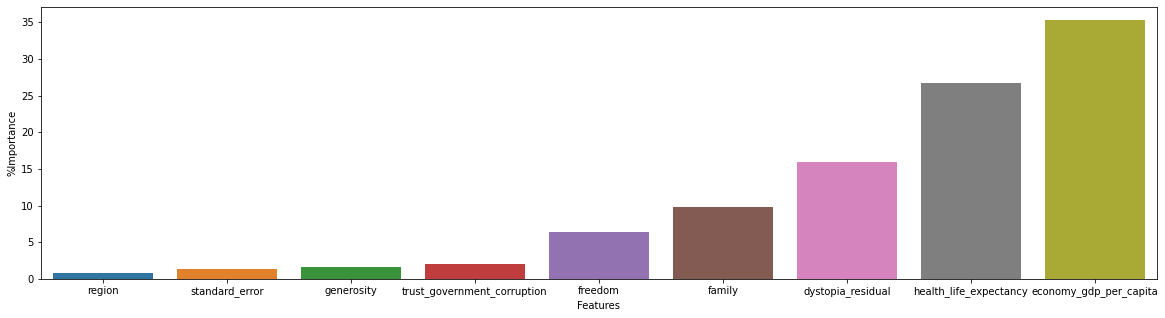

In [40]:
data = {'Features': X.columns , '%Importance': rf_clf.feature_importances_ * 100 }
temp = pd.DataFrame(data)

plt.figure(figsize =(20,5))
sns.barplot(data =temp.sort_values(by =['%Importance']) ,x='Features', y ='%Importance')

In [42]:
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor

dt_clf = DecisionTreeRegressor()
knn_clf = KNeighborsRegressor()
ada_clf = AdaBoostRegressor()
xgb_clf= XGBRegressor()
rf_clf = RandomForestRegressor()

voting_clf = VotingRegressor(
 estimators=[ ('rf', rf_clf), ('knn',knn_clf),('dt',dt_clf),('ada',ada_clf),('xgb',xgb_clf)])


voting_clf.fit(x_train,y_train)
models = ['RandomForestRegressor ','KNeighborsRegressor','DecisionTreeRegressor ',
          'AdaBoostRegressor','XGBRegressor']
value =[]
value_tune=[]
for clf in (rf_clf,knn_clf,dt_clf,ada_clf,xgb_clf):
    clf.fit(x_train, y_train)
    pred = clf.predict(x_pred)
    print(clf.__class__.__name__, r2_score(y_pred, pred)* 100)
    value.append(r2_score(y_pred, pred)* 100)

df={'Models': models ,'R2_score':value}
table = pd.DataFrame(df)

RandomForestRegressor 89.7291848838717
KNeighborsRegressor 88.40384905874942
DecisionTreeRegressor 74.83957710763694
AdaBoostRegressor 86.10269823735841
XGBRegressor 86.84393727771777


In [43]:
table

Models   R2_score
0  RandomForestRegressor   89.729185
1     KNeighborsRegressor  88.403849
2  DecisionTreeRegressor   74.839577
3       AdaBoostRegressor  86.102698
4            XGBRegressor  86.843937

## finding the best hyperparameter using GRID Search CV


In [44]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [45]:
para_knn = {'n_neighbors':np.arange(1, 50)}
grid_knn = GridSearchCV(knn_clf, param_grid=para_knn, cv=5)
para_dt = {'criterion':['squared_error','absolute_error'],'max_depth':np.arange(1, 50), 'min_samples_leaf':[1,2,4,5,10,20,30,40,80,100]}
grid_dt = GridSearchCV(dt_clf, param_grid=para_dt, cv=5)
param_rf = {'n_estimators':[100,200, 350, 500], 'min_samples_leaf':[2, 10, 30]}
grid_rf = GridSearchCV(rf_clf, param_grid=param_rf, cv=5)


params_ada = {'n_estimators': [50,100,250,400,500,600], 'learning_rate': [0.2,0.5,0.8,1]}
grid_ada =  GridSearchCV(ada_clf, param_grid=params_ada, cv=5)


params_xgb = {'n_estimators': [50,100,250,400,600,800,1000], 'learning_rate': [0.2,0.5,0.8,1]}
grid_xgb =  RandomizedSearchCV(xgb_clf, param_distributions=params_xgb, cv=5)

In [46]:
grid_knn.fit(x_train, y_train)
grid_dt.fit(x_train, y_train)
grid_rf.fit(x_train, y_train)
grid_ada.fit(x_train, y_train)
grid_xgb.fit(x_train, y_train)


reg = ['grid_log','grid_knn','grid_dt','grid_rf','grid_ada','grid_xgb']


print("parameters for KNN:", grid_knn.best_params_)
print("parameters for Decision Tree:", grid_dt.best_params_)
print("parameters for Random Forest:", grid_rf.best_params_)
print("parameters for AdaBoost:", grid_ada.best_params_)
print("parameters for XGBoost:", grid_xgb.best_params_)

parameters for KNN: {'n_neighbors': 2}
parameters for Decision Tree: {'criterion': 'squared_error', 'max_depth': 31, 'min_samples_leaf': 1}
parameters for Random Forest: {'min_samples_leaf': 2, 'n_estimators': 200}
parameters for AdaBoost: {'learning_rate': 0.8, 'n_estimators': 400}
parameters for XGBoost: {'n_estimators': 400, 'learning_rate': 0.2}


## Applying the best parameters on our classifier models.

In [47]:
knn = KNeighborsRegressor(n_neighbors= 2)
dt = DecisionTreeRegressor(criterion= 'squared_error', max_depth= 31, min_samples_leaf= 1)
rf = RandomForestRegressor(min_samples_leaf= 2, n_estimators = 200)
ada =AdaBoostRegressor(learning_rate= 0.8, n_estimators= 400)
xgb = XGBRegressor(n_estimators= 400, learning_rate= 0.2)

In [48]:

for clf in (rf,knn, dt,ada,xgb):
        clf.fit(x_train, y_train)
        pred = clf.predict(x_pred)
        print(clf.__class__.__name__, r2_score(y_pred,pred) * 100)
        value_tune.append(r2_score(y_pred, pred)* 100)
        

RandomForestRegressor 89.36391264303487
KNeighborsRegressor 86.60976562666418
DecisionTreeRegressor 70.22205154844477
AdaBoostRegressor 87.7215146014689
XGBRegressor 91.90766125369494


In [50]:
table['Tuning_R2_score']= value_tune

In [51]:
table

Models   R2_score  Tuning_R2_score
0  RandomForestRegressor   89.729185        89.363913
1     KNeighborsRegressor  88.403849        86.609766
2  DecisionTreeRegressor   74.839577        70.222052
3       AdaBoostRegressor  86.102698        87.721515
4            XGBRegressor  86.843937        91.907661

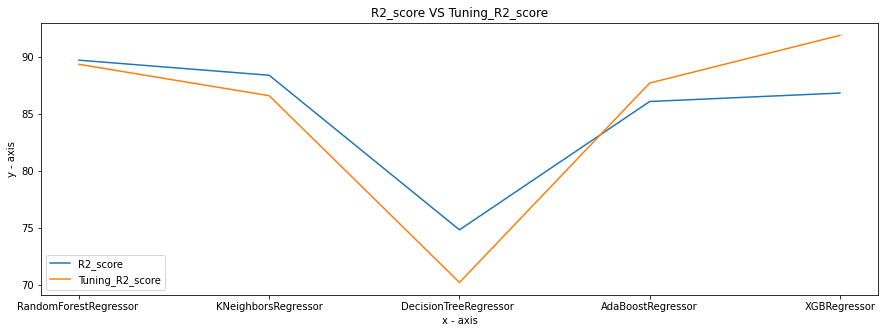

In [65]:
plt.rcParams["figure.figsize"] = (15,5)
plt.plot(table['Models'],table['R2_score'], label = "R2_score")
plt.plot(table['Models'],table['Tuning_R2_score'], label = "Tuning_R2_score")
plt.xlabel('x - axis')
plt.ylabel('y - axis')
plt.title('R2_score VS Tuning_R2_score')
plt.legend()
plt.show()